### EXPLORATORY DATA ANALYSIS ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv("../data/processed/cleaned.csv", parse_dates=["od_start_time", "od_end_time"])
df_trips = pd.read_csv("../data/processed/trips.csv", parse_dates=["od_start_time", "od_end_time"])
df_routes = pd.read_csv("../data/processed/routes.csv", parse_dates=["route_start_time", "route_end_time"])


In [3]:
import sys
from pathlib import Path

src_path = Path("../src").resolve()  # adjust relative to the notebook location
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

In [4]:
from data_viz import (
    plot_trip_start_times,
    plot_trip_durations,
    plot_top_source_centers,
    plot_trip_delay,
    plot_trip_volume_by_day,
    plot_sla_breaches,
    plot_geographic_distribution,
    plot_route_total_times,
    plot_trip_total_times
)

# 1. Distribution of Trip Start Times

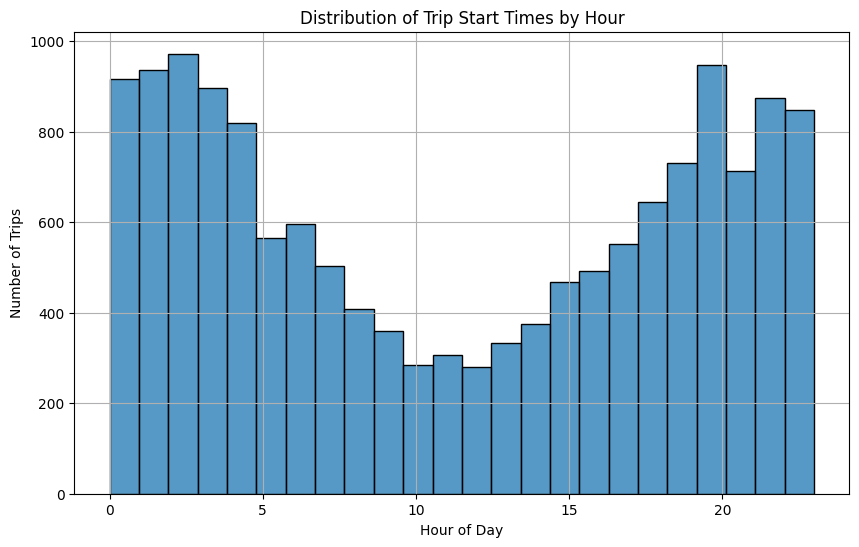

In [5]:
plot_trip_start_times(df_trips)

# 2. Distribution of Trip Durations

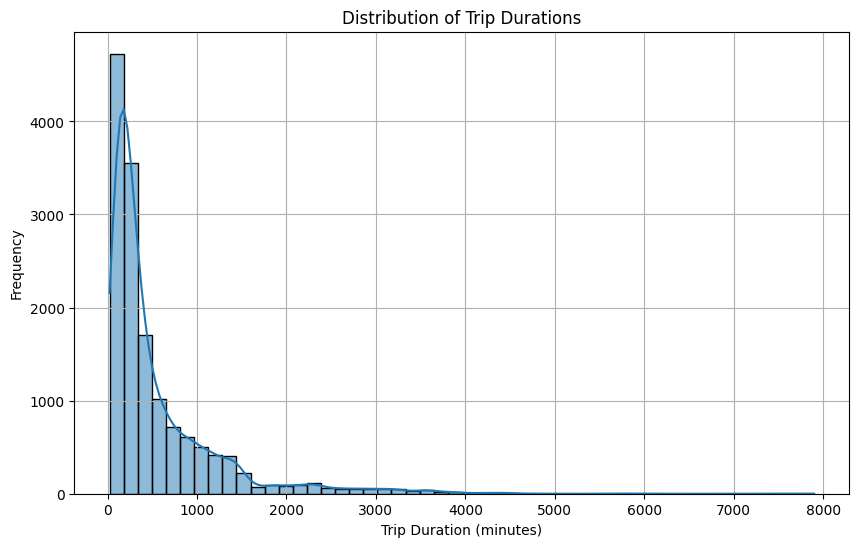

In [6]:
plot_trip_durations(df_trips)

# 3. Top Source Centres

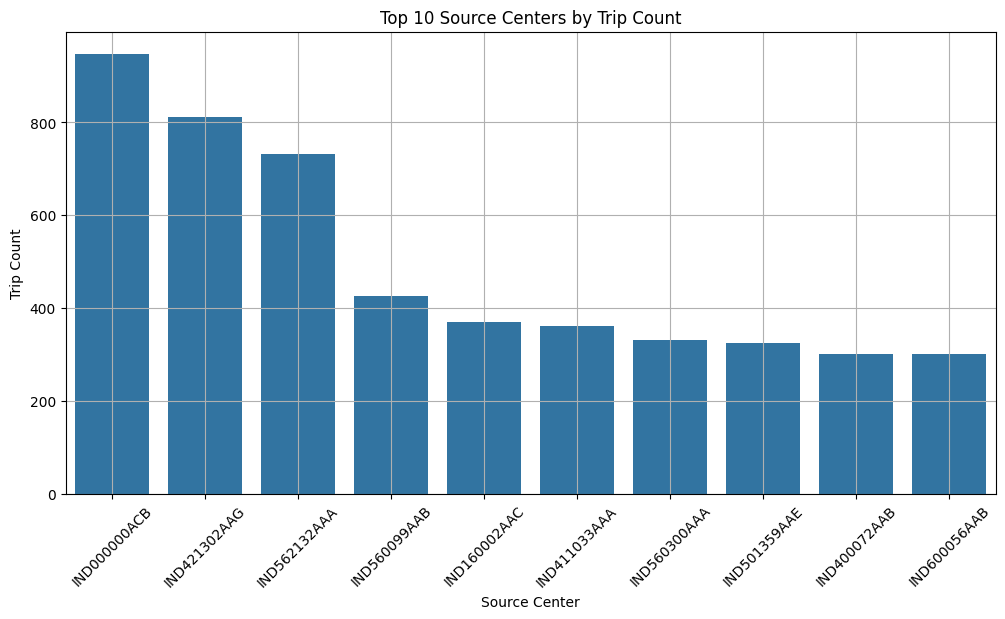

In [7]:
plot_top_source_centers(df_trips)

# 4. Distribution of Trip Delays (Actual vs Planned Times)

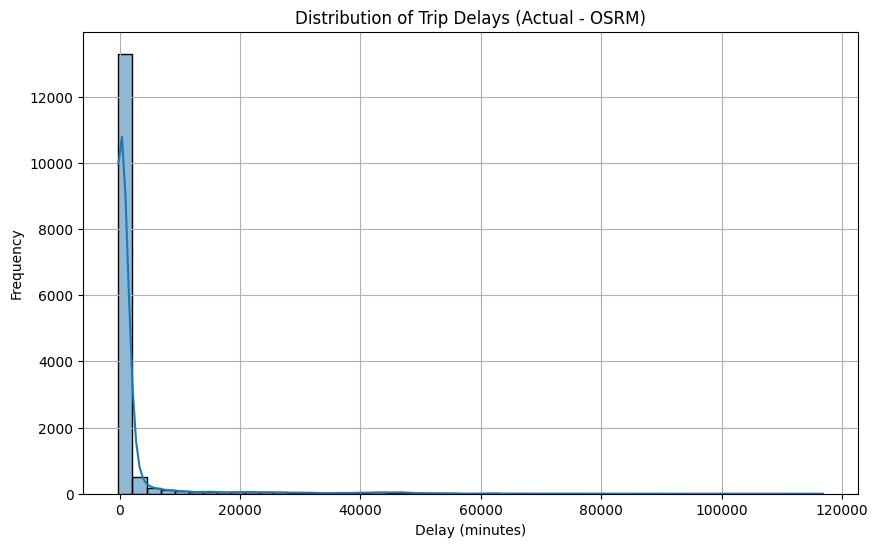

In [8]:
plot_trip_delay(df_trips)

# 5. Trip Volume over Time

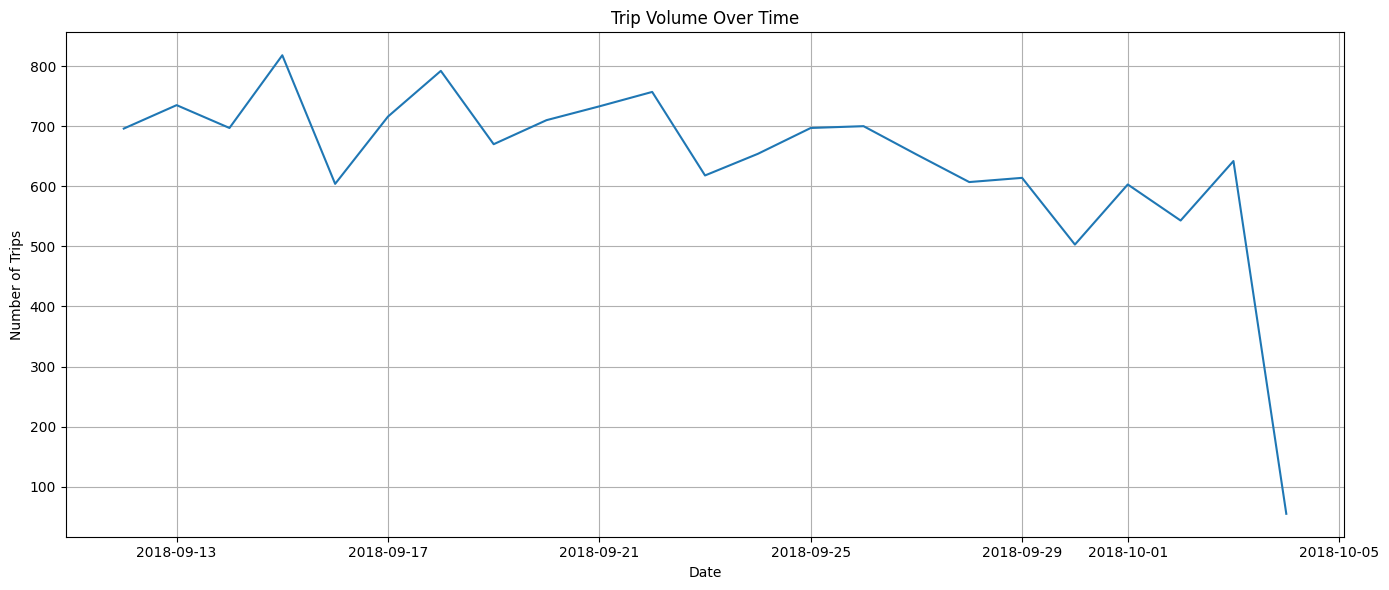

In [9]:
plot_trip_volume_by_day(df_trips)

# 6. SLA Breach Distribution (Over 30 mins late = Breach)

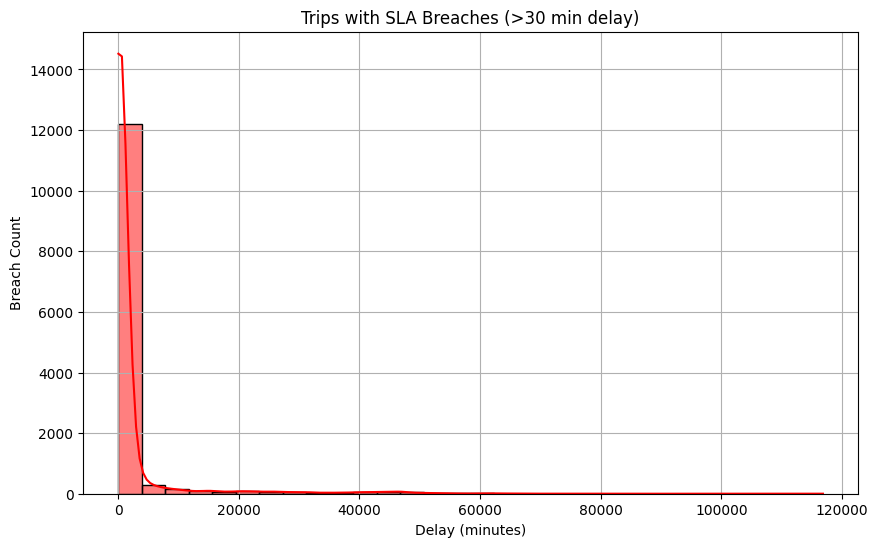

In [10]:
plot_sla_breaches(df_trips, threshold_minutes=30)

# 7. Top 20 Route Pairs by Volume

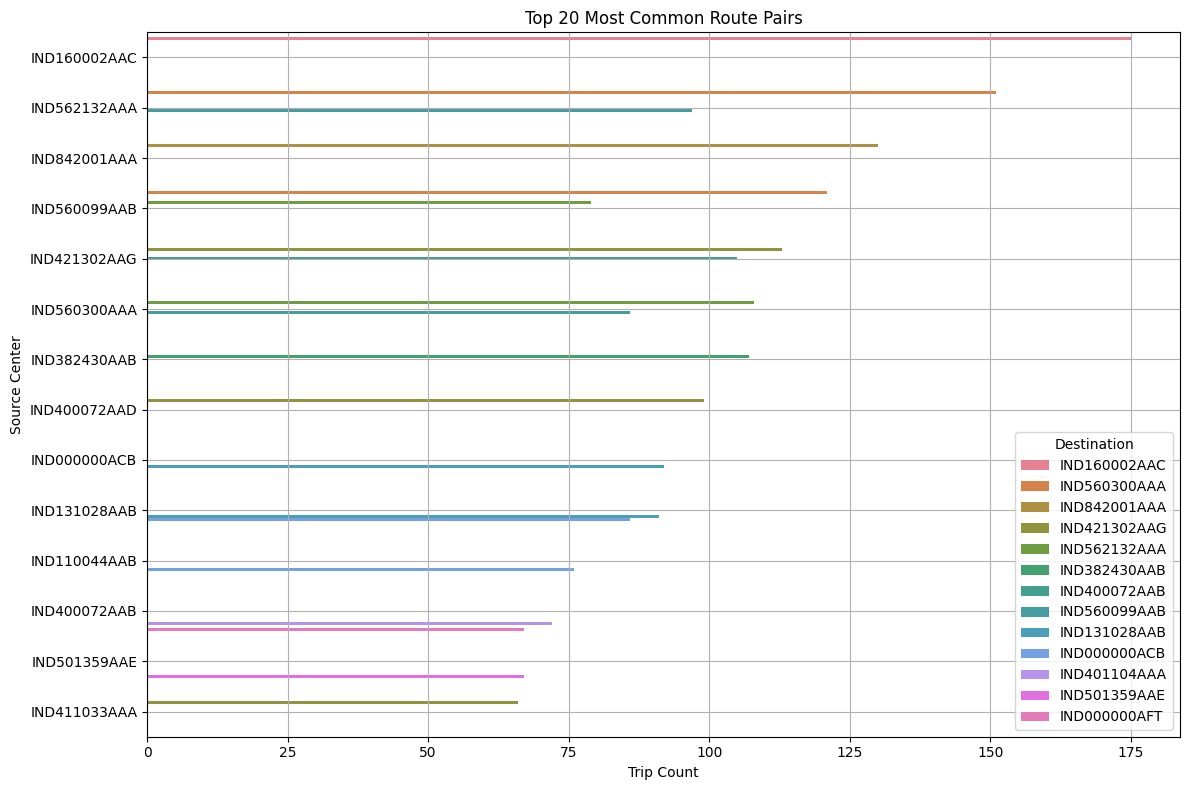

In [11]:
plot_geographic_distribution(df_trips)

# 8. Driver Shift Lengths in Hours

=== ROUTE DURATION ANALYSIS ===


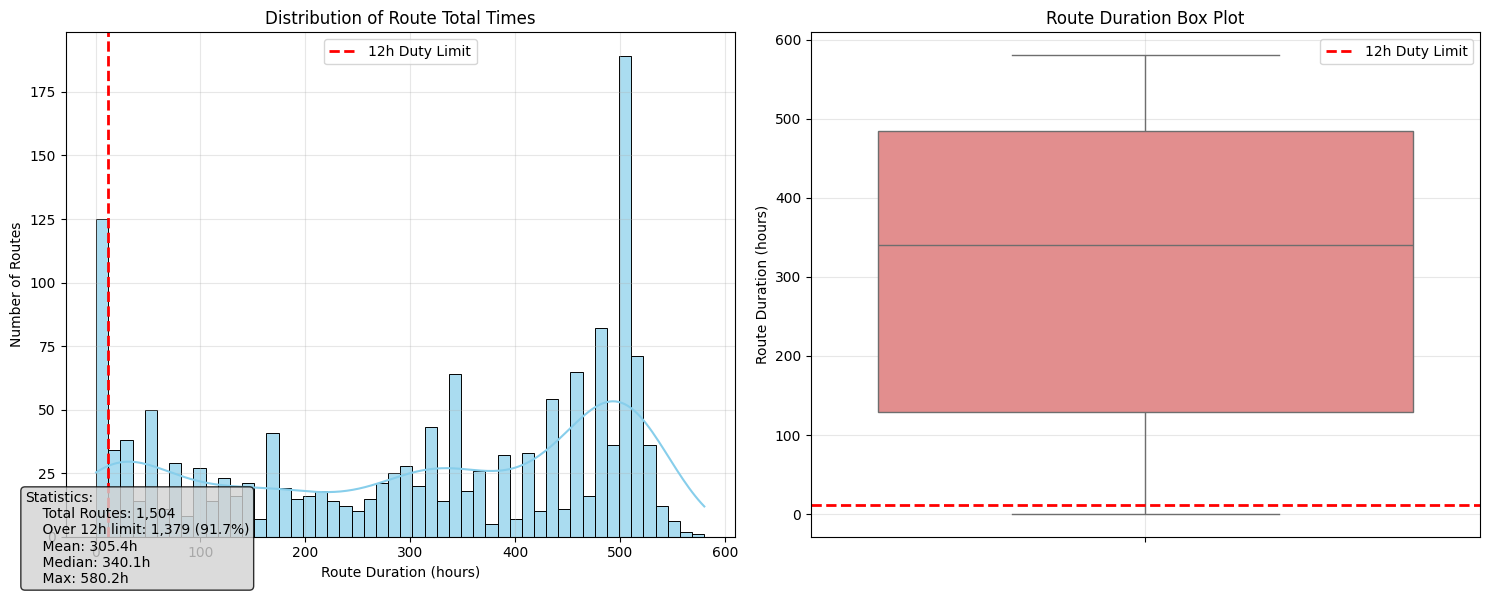


=== TRIP DURATION ANALYSIS ===


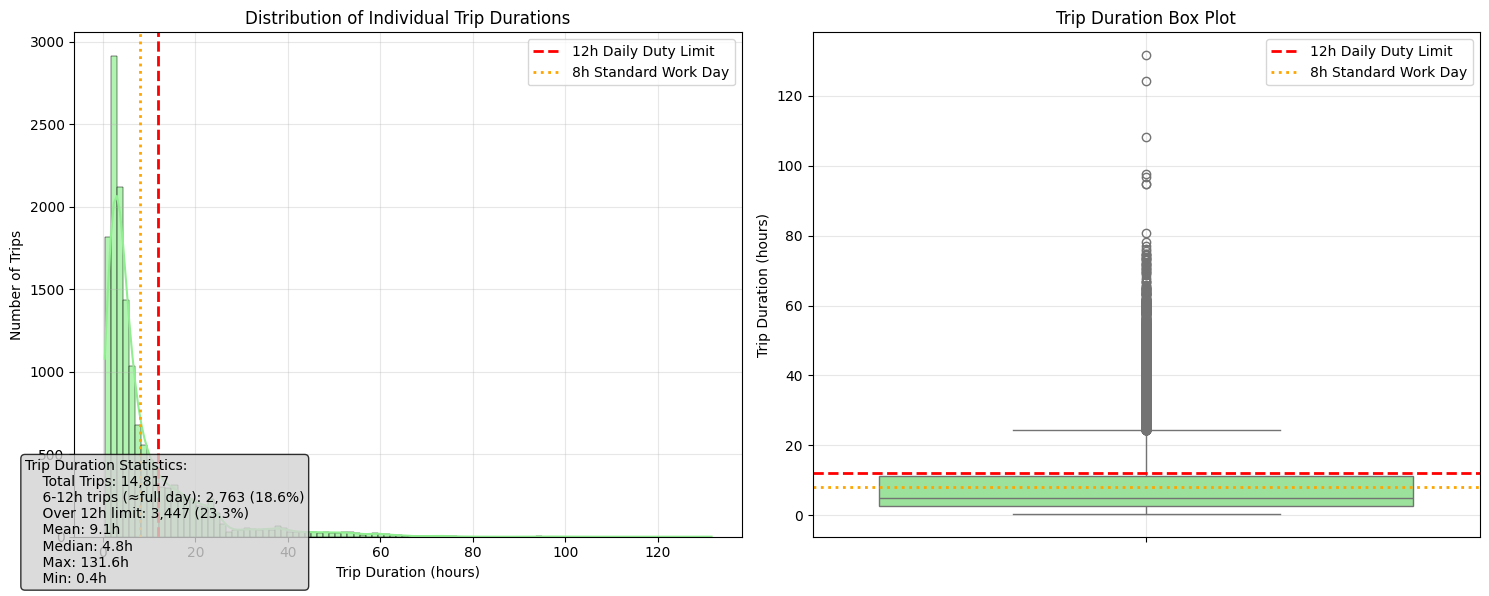


=== SUMMARY COMPARISON ===
Routes (multi-day): Mean 305.4h, Max 580.2h
Trips (single): Mean 9.1h, Max 131.6h
Trips 6-12h (full day work): 18.6%


In [12]:
from data_viz import plot_route_total_times, plot_trip_total_times

# Visualize route total times (multi-day routes)
print("=== ROUTE DURATION ANALYSIS ===")
route_stats = plot_route_total_times(df_routes)

# Visualize individual trip durations (testing 1 trip = 1 day hypothesis)
print("\n=== TRIP DURATION ANALYSIS ===") 
trip_stats = plot_trip_total_times(df_trips)

# Summary comparison
if trip_stats and route_stats:
    print(f"\n=== SUMMARY COMPARISON ===")
    print(f"Routes (multi-day): Mean {route_stats['mean_hours']:.1f}h, Max {route_stats['max_hours']:.1f}h")
    print(f"Trips (single): Mean {trip_stats['mean_hours']:.1f}h, Max {trip_stats['max_hours']:.1f}h")
    print(f"Trips 6-12h (full day work): {trip_stats['near_full_day_percentage']:.1f}%")